### Import Libraries

In [1]:
import pandas as pd
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

### Load Data

In [2]:
users_df = pd.read_excel("../data/Visitors Preference Dataset.xlsx")
places_df = pd.read_excel("../data/Places Dataset.xlsx")

In [3]:
users_df.head()

,User ID,Name,Email,Preferred Activities,Bucket list destinations Sri Lanka
0,1,Jennifer Quinn,jennifer.quinn@example.com,"['cycling', 'historical monuments', 'village h...","['Polonnaruwa', 'Hatton', 'Anuradhapura', 'Ell..."
1,2,Emily Perry,emily.perry@example.com,"['butterfly watching', 'hot springs', 'wildlif...","['Madunagala Hot Water Spring', 'Wilpattu Nati..."
2,3,Danielle Mcbride,danielle.mcbride@example.com,"['sea cruises', 'themed parks', 'craft worksho...","['Mirissa Beach', 'Negombo Lagoon', 'Batadomba..."
3,4,Angelica Wilson,angelica.wilson@example.com,"['fishing', 'hot springs', 'sailing']","['Maha Oya Hot Water Springs', 'Colombo Port C..."
4,5,Laurie Powers,laurie.powers@example.com,"['history tours', 'sailing', 'literary tours']","['Negombo Lagoon', 'Colombo Port City', 'Galle..."


In [4]:
places_df.head()

,name,lat,lng,formatted_address,rating,user_ratings_total,latest_reviews
0,Arugam Bay Beach,6.840408,81.836848,"Arugam Bay Beach, Sri Lanka",4.8,1591.0,['Arugam Bay Beach is a surfer's paradise! I s...
1,Mirissa Beach,5.944703,80.459161,"Mirissa, Sri Lanka",4.6,1748.0,['Mirissa Beach is truly a gem on Sri LankaÃ¢Â...
2,Weligama Beach (surf and stay),5.972486,80.435714,"Weligama, Sri Lanka",4.4,325.0,['Weligama Beach is a fantastic spot for both ...
3,Ahangama,5.973975,80.362159,"Ahangama, Sri Lanka",NaN,NaN,['Ahangama was a bit disappointing for me as a...
4,Hikkaduwa Beach,6.137727,80.099060,"Hikkaduwa Beach, Sri Lanka",4.7,1438.0,['Hikkaduwa Beach is a delightful escape for s...


### Data Preprocessing

In [5]:
users_df.fillna("", inplace=True)
places_df.fillna("", inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_29256\1227345201.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  places_df.fillna("", inplace=True)


In [6]:
users_df['Preferred Activities'] = users_df['Preferred Activities'].apply(lambda x: ' '.join(x.split()))
users_df['Bucket list destinations Sri Lanka'] = users_df['Bucket list destinations Sri Lanka'].apply(lambda x: ' '.join(x.split()))

In [7]:
users_df['Preferred Activities'] = users_df['Preferred Activities'].apply(
    lambda x: eval(x) if isinstance(x, str) and x.strip() != '' else ''
)
users_df['Bucket list destinations Sri Lanka'] = users_df['Bucket list destinations Sri Lanka'].apply(
    lambda x: eval(x) if isinstance(x, str) and x.strip() != '' else ''
)

In [8]:
users_df['Preferred Activities'] = users_df['Preferred Activities'].apply(lambda x: " ".join(x))
users_df['Bucket list destinations Sri Lanka'] = users_df['Bucket list destinations Sri Lanka'].apply(lambda x: " ".join(x))

In [9]:
users_df.head()

,User ID,Name,Email,Preferred Activities,Bucket list destinations Sri Lanka
0,1,Jennifer Quinn,jennifer.quinn@example.com,cycling historical monuments village homestays,Polonnaruwa Hatton Anuradhapura Ella Haputale
1,2,Emily Perry,emily.perry@example.com,butterfly watching hot springs wildlife viewing,Madunagala Hot Water Spring Wilpattu National ...
2,3,Danielle Mcbride,danielle.mcbride@example.com,sea cruises themed parks craft workshops,Mirissa Beach Negombo Lagoon Batadombalena Cra...
3,4,Angelica Wilson,angelica.wilson@example.com,fishing hot springs sailing,Maha Oya Hot Water Springs Colombo Port City N...
4,5,Laurie Powers,laurie.powers@example.com,history tours sailing literary tours,Negombo Lagoon Colombo Port City Galle Dutch F...


In [10]:
places_df['latest_reviews'] = places_df['latest_reviews'].apply(
    lambda x: ''.join([i if i.isalpha() or i.isspace() else '' for i in x])
)
places_df['formatted_address'] = places_df['formatted_address'].apply(
    lambda x: ''.join([i if i.isalpha() or i.isspace() else '' for i in x])
)

In [11]:
places_df['latest_reviews'] = places_df['latest_reviews'].apply(lambda x: x.lower())
places_df['name'] = places_df['name'].apply(lambda x: x.lower())
places_df['formatted_address'] = places_df['formatted_address'].apply(lambda x: x.lower())
users_df['Preferred Activities'] = users_df['Preferred Activities'].apply(lambda x: x.lower())
users_df['Bucket list destinations Sri Lanka'] = users_df['Bucket list destinations Sri Lanka'].apply(lambda x: x.lower())

In [12]:
stop_words = set(stopwords.words('english'))

places_df['latest_reviews'] = places_df['latest_reviews'].apply(
    lambda x: ' '.join([word for word in x.split() if word not in stop_words])
)

In [13]:
places_df.head()

,name,lat,lng,formatted_address,rating,user_ratings_total,latest_reviews
0,arugam bay beach,6.840408,81.836848,arugam bay beach sri lanka,4.8,1591.0,arugam bay beach surfers paradise spent incred...
1,mirissa beach,5.944703,80.459161,mirissa sri lanka,4.6,1748.0,mirissa beach truly gem sri lankaãââs southern...
2,weligama beach (surf and stay),5.972486,80.435714,weligama sri lanka,4.4,325.0,weligama beach fantastic spot beginner experie...
3,ahangama,5.973975,80.362159,ahangama sri lanka,,,ahangama bit disappointing solo traveler surfi...
4,hikkaduwa beach,6.137727,80.09906,hikkaduwa beach sri lanka,4.7,1438.0,hikkaduwa beach delightful escape solo travele...


In [14]:
combined_features_places = places_df['name'] + ' ' + places_df['formatted_address'] + ' ' + places_df['latest_reviews']

# 1. Destination Based Recommendation

In [15]:
tfidf = TfidfVectorizer()
feature_vectors_places = tfidf.fit_transform(combined_features_places)

In [16]:
print(feature_vectors_places)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 50756 stored elements and shape (411, 4592)>
  Coords	Values
  (0, 212)	0.4993850056109005
  (0, 307)	0.4446830330343226
  (0, 310)	0.47881435034636527
  (0, 3699)	0.011274037794724703
  (0, 2114)	0.011274037794724703
  (0, 3845)	0.058954918623078216
  (0, 2759)	0.04595956626282812
  (0, 3670)	0.04198379633958364
  (0, 1866)	0.03397645681184578
  (0, 904)	0.09579402510890483
  (0, 3292)	0.058954918623078216
  (0, 4400)	0.0787979215317267
  (0, 2225)	0.05017471746314024
  (0, 3842)	0.17165105409786963
  (0, 3422)	0.06676948613401791
  (0, 1364)	0.04459103443039949
  (0, 329)	0.05571158006539211
  (0, 2192)	0.04926171518659393
  (0, 227)	0.03445260055448963
  (0, 2103)	0.052121320664890655
  (0, 1480)	0.028054584604051344
  (0, 2226)	0.07689131515482353
  (0, 1388)	0.05571158006539211
  (0, 4085)	0.048624622280973036
  (0, 2233)	0.034394061508734704
  :	:
  (410, 1317)	0.04584215116159745
  (410, 1412)	0.08084194246925927
  (4

In [17]:
numerical_features = ['lat', 'lng', 'rating', 'user_ratings_total']

In [18]:
numerical_features_df = places_df[numerical_features]

In [19]:
numerical_features_df['lat'] = pd.to_numeric(numerical_features_df['lat'], errors='coerce')
numerical_features_df['lng'] = pd.to_numeric(numerical_features_df['lng'], errors='coerce')
numerical_features_df['rating'] = pd.to_numeric(numerical_features_df['rating'], errors='coerce')
numerical_features_df['user_ratings_total'] = pd.to_numeric(numerical_features_df['user_ratings_total'], errors='coerce')

C:\Users\Asus\AppData\Local\Temp\ipykernel_29256\2719413390.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_features_df['lat'] = pd.to_numeric(numerical_features_df['lat'], errors='coerce')
C:\Users\Asus\AppData\Local\Temp\ipykernel_29256\2719413390.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_features_df['lng'] = pd.to_numeric(numerical_features_df['lng'], errors='coerce')
C:\Users\Asus\AppData\Local\Temp\ipykernel_29256\2719413390.py:3: SettingWithCopyWarning: 
A value is tr

In [20]:
numerical_features_df.fillna(0, inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_29256\2399275981.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_features_df.fillna(0, inplace=True)


In [21]:
numerical_features_df.isna().sum()

lat                   0
lng                   0
rating                0
user_ratings_total    0
dtype: int64

In [22]:
numerical_features_df.head()

,lat,lng,rating,user_ratings_total
0,6.840408,81.836848,4.8,1591.0
1,5.944703,80.459161,4.6,1748.0
2,5.972486,80.435714,4.4,325.0
3,5.973975,80.362159,0.0,0.0
4,6.137727,80.099060,4.7,1438.0


In [23]:
from sklearn.preprocessing import MinMaxScaler

In [24]:
scaler = MinMaxScaler()
numerical_features_df = scaler.fit_transform(numerical_features_df)

In [25]:
feature_vectors_places = pd.concat([pd.DataFrame(feature_vectors_places.toarray()), pd.DataFrame(numerical_features_df)], axis=1)

In [26]:
feature_vectors_places.head()

,0,1,2,3,4,5,6,7,8,9,...,4586,4587,4588,4589,4590,4591,0,1,2,3
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.696518,0.999722,0.96,0.059508
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.605314,0.982892,0.92,0.065380
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.608143,0.982606,0.88,0.012156
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.608294,0.981707,0.00,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.624968,0.978493,0.94,0.053785


In [27]:
feature_vectors_places.shape

(411, 4596)

In [28]:
similarity = cosine_similarity(feature_vectors_places)

In [29]:
similarity.shape

(411, 411)

In [30]:
print(similarity)

[[1.         0.80427336 0.80841075 ... 0.79195501 0.79661011 0.80552598]
 [0.80427336 1.         0.77842336 ... 0.79515382 0.78809053 0.79015031]
 [0.80841075 0.77842336 1.         ... 0.7714572  0.77714938 0.79171111]
 ...
 [0.79195501 0.79515382 0.7714572  ... 1.         0.78458801 0.81338704]
 [0.79661011 0.78809053 0.77714938 ... 0.78458801 1.         0.80260575]
 [0.80552598 0.79015031 0.79171111 ... 0.81338704 0.80260575 1.        ]]


In [31]:
def find_place_index(df, place):    
    place = place.lower()
    
    if place in df['name'].values:
        return df[df['name'] == place].index[0]
    else:
        mask = (
            df['name'].str.lower().str.contains(place) |
            df['formatted_address'].str.lower().str.contains(place) |
            df['latest_reviews'].str.lower().str.contains(place)
        )
        indices = df[mask].index.tolist()
        if indices:
            return indices[0]
        else:
            return "No matches found"

In [32]:
def get_user_bucket_list(user_id):
    user = users_df[users_df['User ID'] == user_id]
    return user['Bucket list destinations Sri Lanka'].values[0]

In [33]:
def get_best_5_recommendation_based_on_similarity(user_id):
    user_bucket_list = get_user_bucket_list(user_id)
    user_bucket_list = user_bucket_list.split()
    
    for place in user_bucket_list:
        index = find_place_index(places_df, place)
        if index != "No matches found":
            similarity_scores = list(enumerate(similarity[index]))
            similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
            similarity_scores = similarity_scores[0:5]
            print("Similar places to", place)
            for i in similarity_scores:
                print(f"{places_df.iloc[i[0]]['name']} - Similarity Score: {i[1]}")
                
            print()
        else:
            print("No matches found")
            print()

In [34]:
get_best_5_recommendation_based_on_similarity(1)

Similar places to polonnaruwa
polonnaruwa - Similarity Score: 0.9999999999999996
kandy - Similarity Score: 0.7280543201020842
anuradhapura - Similarity Score: 0.7161872222849933
ambalangoda - Similarity Score: 0.6850902552427123
colombo - Similarity Score: 0.6709740937904064

Similar places to hatton
sri pada / adam's peak - Similarity Score: 1.0
sripada peak wilderness sanctuary - Similarity Score: 0.7999849220489437
ella rock trailhead - Similarity Score: 0.75819078005745
pidurangala rock - Similarity Score: 0.7555269298435722
chariot path - Similarity Score: 0.7503923758140986

Similar places to anuradhapura
anuradhapura - Similarity Score: 1.0000000000000002
polonnaruwa - Similarity Score: 0.7161872222849933
colombo - Similarity Score: 0.6754000812327533
kataragama - Similarity Score: 0.6700150951907882
trincomalee - Similarity Score: 0.6676670715326544

Similar places to ella
ella rock trailhead - Similarity Score: 1.0
peacock's rock - Similarity Score: 0.7864163571993661
pidurang

In [35]:
places_df.head()

,name,lat,lng,formatted_address,rating,user_ratings_total,latest_reviews
0,arugam bay beach,6.840408,81.836848,arugam bay beach sri lanka,4.8,1591.0,arugam bay beach surfers paradise spent incred...
1,mirissa beach,5.944703,80.459161,mirissa sri lanka,4.6,1748.0,mirissa beach truly gem sri lankaãââs southern...
2,weligama beach (surf and stay),5.972486,80.435714,weligama sri lanka,4.4,325.0,weligama beach fantastic spot beginner experie...
3,ahangama,5.973975,80.362159,ahangama sri lanka,,,ahangama bit disappointing solo traveler surfi...
4,hikkaduwa beach,6.137727,80.09906,hikkaduwa beach sri lanka,4.7,1438.0,hikkaduwa beach delightful escape solo travele...


In [36]:
users_df.head()

,User ID,Name,Email,Preferred Activities,Bucket list destinations Sri Lanka
0,1,Jennifer Quinn,jennifer.quinn@example.com,cycling historical monuments village homestays,polonnaruwa hatton anuradhapura ella haputale
1,2,Emily Perry,emily.perry@example.com,butterfly watching hot springs wildlife viewing,madunagala hot water spring wilpattu national ...
2,3,Danielle Mcbride,danielle.mcbride@example.com,sea cruises themed parks craft workshops,mirissa beach negombo lagoon batadombalena cra...
3,4,Angelica Wilson,angelica.wilson@example.com,fishing hot springs sailing,maha oya hot water springs colombo port city n...
4,5,Laurie Powers,laurie.powers@example.com,history tours sailing literary tours,negombo lagoon colombo port city galle dutch f...


# 2. Preferred Activity and Destination Based Recommendation

In [37]:
combined_features_places2 = places_df['name'] + ' ' + places_df['latest_reviews']
combined_features_users2 = users_df['Preferred Activities'] + ' ' + users_df['Bucket list destinations Sri Lanka']

In [38]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix_places = tfidf_vectorizer.fit_transform(combined_features_places)

In [39]:
tfidf_matrix_users = tfidf_vectorizer.transform(combined_features_users2)

In [40]:
similarity2 = cosine_similarity(tfidf_matrix_users, tfidf_matrix_places)

In [41]:
similarity2

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.01278921, 0.00647579, ..., 0.01392877, 0.00181852,
        0.        ],
       [0.12140821, 0.25027184, 0.10841103, ..., 0.13161176, 0.1316433 ,
        0.13723016],
       ...,
       [0.        , 0.        , 0.        , ..., 0.01323508, 0.0174363 ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00857967, 0.02124353, 0.00957649, ..., 0.00090579, 0.01162871,
        0.00171908]])

In [42]:
similarity2.shape

(10000, 411)

In [43]:
def get_recommendations(user_id):
    user = users_df[users_df['User ID'] == user_id]
    user_features = user['Preferred Activities'] + ' ' + user['Bucket list destinations Sri Lanka']
    user_features = tfidf_vectorizer.transform(user_features)
    similarity_scores = list(enumerate(cosine_similarity(user_features, tfidf_matrix_places)[0]))
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    similarity_scores = similarity_scores[0:10]
    
    print("User's Preferred Activities:")
    print(user['Preferred Activities'].values[0])
    print()
    print("User's Bucket List Destinations:")
    print(user['Bucket list destinations Sri Lanka'].values[0])
    print()
    
    print("Recommended Places")
    for i in similarity_scores:
        print(f"{places_df.iloc[i[0]]['name']} - Similarity Score: {i[1]}")
        

In [44]:
get_recommendations(1)

User's Preferred Activities:
cycling historical monuments village homestays

User's Bucket List Destinations:
polonnaruwa hatton anuradhapura ella haputale

Recommended Places
haputale - Similarity Score: 0.2777230567969404
anuradhapura - Similarity Score: 0.22872848465513385
polonnaruwa - Similarity Score: 0.2192200940688564
polonnaruwa ancient city - Similarity Score: 0.1352026894504374
anuradhapura new town - Similarity Score: 0.10972541767429929
polonnaruwa sivan kovil - Similarity Score: 0.10850280944438116
pandalawa ella - Similarity Score: 0.10363269551931853
watawala ella - Similarity Score: 0.10125015100455308
madola ella - Similarity Score: 0.09856690240815293
dhushan ella - Similarity Score: 0.0947122767032006


# 3. Sentiment Analysis

In [45]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [46]:
MODEL = "cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

C:\Users\Asus\Desktop\Research Mine\Models\VAE\venv\Lib\site-packages\huggingface_hub\file_download.py:159: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Asus\.cache\huggingface\hub\models--cardiffnlp--twitter-roberta-base-sentiment. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

C:\Users\Asus\Desktop\Research Mine\Models\VAE\venv\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [47]:
def polarity_score(text):
    encoded_text = tokenizer(text, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'negative': scores[0],
        'neutral': scores[1],
        'positive': scores[2]
    }
    return scores_dict

In [48]:
polarity_score("I love this place")

{'negative': 0.0037156537, 'neutral': 0.007781187, 'positive': 0.98850316}

In [112]:
df = pd.read_excel("../data/Places Dataset.xlsx")
df.head()

,name,lat,lng,formatted_address,rating,user_ratings_total,latest_reviews
0,Arugam Bay Beach,6.840408,81.836848,"Arugam Bay Beach, Sri Lanka",4.8,1591.0,['Arugam Bay Beach is a surfer's paradise! I s...
1,Mirissa Beach,5.944703,80.459161,"Mirissa, Sri Lanka",4.6,1748.0,['Mirissa Beach is truly a gem on Sri LankaÃ¢Â...
2,Weligama Beach (surf and stay),5.972486,80.435714,"Weligama, Sri Lanka",4.4,325.0,['Weligama Beach is a fantastic spot for both ...
3,Ahangama,5.973975,80.362159,"Ahangama, Sri Lanka",NaN,NaN,['Ahangama was a bit disappointing for me as a...
4,Hikkaduwa Beach,6.137727,80.099060,"Hikkaduwa Beach, Sri Lanka",4.7,1438.0,['Hikkaduwa Beach is a delightful escape for s...


In [113]:
from tqdm.notebook import tqdm
import re

In [114]:
def parse_custom_list(text):
    text = text.strip("[]")
    items = re.split(r"(?<!\\),\s*(?=(?:[^\']*\'[^\']*\')*[^\']*$)", text)
    items = [item.strip().strip("'") for item in items]
    return items

In [115]:
df['latest_reviews'] = df['latest_reviews'].apply(lambda x: parse_custom_list(x))

In [116]:
df.head()

,name,lat,lng,formatted_address,rating,user_ratings_total,latest_reviews
0,Arugam Bay Beach,6.840408,81.836848,"Arugam Bay Beach, Sri Lanka",4.8,1591.0,[Arugam Bay Beach is a surfer's paradise! I sp...
1,Mirissa Beach,5.944703,80.459161,"Mirissa, Sri Lanka",4.6,1748.0,[Mirissa Beach is truly a gem on Sri LankaÃ¢Â€...
2,Weligama Beach (surf and stay),5.972486,80.435714,"Weligama, Sri Lanka",4.4,325.0,[Weligama Beach is a fantastic spot for both b...
3,Ahangama,5.973975,80.362159,"Ahangama, Sri Lanka",NaN,NaN,[Ahangama was a bit disappointing for me as a ...
4,Hikkaduwa Beach,6.137727,80.099060,"Hikkaduwa Beach, Sri Lanka",4.7,1438.0,[Hikkaduwa Beach is a delightful escape for so...


In [117]:
res = {}
for i, row in tqdm(df.iterrows(), total=df.shape[0]):
    text = row['latest_reviews']
    if text:
        scores = []
        for review in text:
            scores.append(polarity_score(review))
        res[i] = scores

  0%|          | 0/411 [00:00<?, ?it/s]

In [118]:
res

{0: [{'negative': 0.0017267218,
   'neutral': 0.008843133,
   'positive': 0.98943007},
  {'negative': 0.0023373489, 'neutral': 0.010707625, 'positive': 0.986955},
  {'negative': 0.0036164555, 'neutral': 0.02376867, 'positive': 0.9726149},
  {'negative': 0.0028008414, 'neutral': 0.029006196, 'positive': 0.968193},
  {'negative': 0.0667193, 'neutral': 0.1632904, 'positive': 0.7699903}],
 1: [{'negative': 0.0012775281, 'neutral': 0.009346075, 'positive': 0.9893764},
  {'negative': 0.002850634, 'neutral': 0.016931962, 'positive': 0.98021734},
  {'negative': 0.0013055463, 'neutral': 0.015967097, 'positive': 0.98272735},
  {'negative': 0.0034119717, 'neutral': 0.025145927, 'positive': 0.97144204},
  {'negative': 0.003956454, 'neutral': 0.015601477, 'positive': 0.98044205}],
 2: [{'negative': 0.0012721109, 'neutral': 0.00966319, 'positive': 0.9890647},
  {'negative': 0.0062762727, 'neutral': 0.029280014, 'positive': 0.96444374},
  {'negative': 0.0022802697, 'neutral': 0.018251, 'positive': 0.

In [119]:
sentiment_scores = {}
for key, value in res.items():
    negative = 0
    neutral = 0
    positive = 0
    for score in value:
        negative += score['negative']
        neutral += score['neutral']
        positive += score['positive']
    negative /= len(value)
    neutral /= len(value)
    positive /= len(value)
    sentiment_scores[key] = {
        'negative': negative,
        'neutral': neutral,
        'positive': positive
    }

In [120]:
sentiment_scores

{0: {'negative': 0.015440133702941238,
  'neutral': 0.047123204357922076,
  'positive': 0.9374366521835327},
 1: {'negative': 0.0025604268070310355,
  'neutral': 0.01659850776195526,
  'positive': 0.9808410406112671},
 2: {'negative': 0.008037467137910426,
  'neutral': 0.03714446369558573,
  'positive': 0.9548180580139161},
 3: {'negative': 0.3373590484261513,
  'neutral': 0.2551884829998016,
  'positive': 0.40745246037840843},
 4: {'negative': 0.22353097763912314,
  'neutral': 0.21646627463290796,
  'positive': 0.5600027324741378},
 5: {'negative': 0.43862889856100085,
  'neutral': 0.33712822794914243,
  'positive': 0.2242428779602051},
 6: {'negative': 0.002811321895569563,
  'neutral': 0.01970221409574151,
  'positive': 0.9774864315986633},
 7: {'negative': 0.003480262984521687,
  'neutral': 0.022174672223627567,
  'positive': 0.9743450522422791},
 8: {'negative': 0.11709530235733837,
  'neutral': 0.20320857724174857,
  'positive': 0.6796961255930364},
 9: {'negative': 0.00553407110

In [121]:
scores_df = pd.DataFrame(sentiment_scores).T

In [122]:
scores_df.head()

,negative,neutral,positive
0,0.015440,0.047123,0.937437
1,0.002560,0.016599,0.980841
2,0.008037,0.037144,0.954818
3,0.337359,0.255188,0.407452
4,0.223531,0.216466,0.560003


In [123]:
df = pd.concat([df, scores_df], axis=1)

In [124]:
df.head()

,name,lat,lng,formatted_address,rating,user_ratings_total,latest_reviews,negative,neutral,positive
0,Arugam Bay Beach,6.840408,81.836848,"Arugam Bay Beach, Sri Lanka",4.8,1591.0,[Arugam Bay Beach is a surfer's paradise! I sp...,0.015440,0.047123,0.937437
1,Mirissa Beach,5.944703,80.459161,"Mirissa, Sri Lanka",4.6,1748.0,[Mirissa Beach is truly a gem on Sri LankaÃ¢Â€...,0.002560,0.016599,0.980841
2,Weligama Beach (surf and stay),5.972486,80.435714,"Weligama, Sri Lanka",4.4,325.0,[Weligama Beach is a fantastic spot for both b...,0.008037,0.037144,0.954818
3,Ahangama,5.973975,80.362159,"Ahangama, Sri Lanka",NaN,NaN,[Ahangama was a bit disappointing for me as a ...,0.337359,0.255188,0.407452
4,Hikkaduwa Beach,6.137727,80.099060,"Hikkaduwa Beach, Sri Lanka",4.7,1438.0,[Hikkaduwa Beach is a delightful escape for so...,0.223531,0.216466,0.560003


In [125]:
import matplotlib.pyplot as plt
import seaborn as sns

In [127]:
df['rating'] = df['rating'].fillna(0)

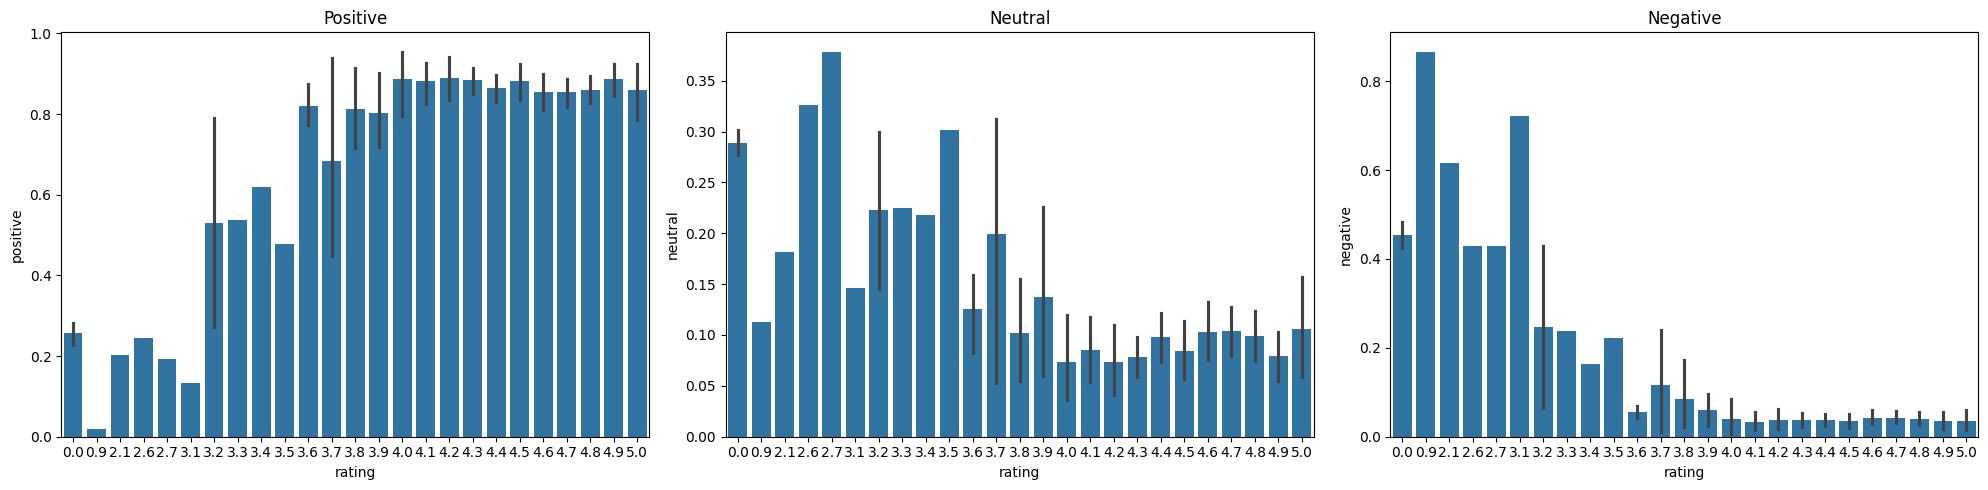

In [129]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
sns.barplot(data=df, x='rating', y='positive', ax=axs[0])
sns.barplot(data=df, x='rating', y='neutral', ax=axs[1])
sns.barplot(data=df, x='rating', y='negative', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()